<a href="https://colab.research.google.com/github/metamath1/noviceml/blob/master/CHAP_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7장 그림 및 예제 코드

In [ ]:
# 기본적인 import들
# 이후 그래프 그리는 코드에는 중복으로 적지 않음.
# 다른 곳으로 그래프 그리는 코드를 복사-붙이기 할 때는 
# 이 import 코드와 함께 복사-붙이기 해야함
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as mfm
from matplotlib.patches import Rectangle, Circle, PathPatch, Arc
from mpl_toolkits.mplot3d import Axes3D 
import mpl_toolkits.mplot3d.art3d as art3d

# numpy 출력 형식 지정
np.set_printoptions(precision=4, linewidth=150)

# matplotlib 스타일 지정
mpl.style.use('bmh')
mpl.style.use('seaborn-whitegrid')
style = plt.style.library['bmh']
# 스타일 컬러를 쉽게 쓸 수 있도록 리스트 저장
style_colors = [ c['color'] for c in style['axes.prop_cycle'] ]

# 그림을 로컬 폴더에 저장하고 싶으면 True로 수정 
file_print = False

In [ ]:
from matplotlib.text import Text, TextPath
from matplotlib.transforms import Affine2D

# https://matplotlib.org/3.1.1/gallery/mplot3d/pathpatch3d.html
def text3d(ax, xyz, s, zdir="z", size=None, angle=0, usetex=False, **kwargs):
    '''
    Plots the string 's' on the axes 'ax', with position 'xyz', size 'size',
    and rotation angle 'angle'.  'zdir' gives the axis which is to be treated
    as the third dimension.  usetex is a boolean indicating whether the string
    should be interpreted as latex or not.  Any additional keyword arguments
    are passed on to transform_path.

    Note: zdir affects the interpretation of xyz.
    '''
    x, y, z = xyz
    if zdir == "y":
        xy1, z1 = (x, z), y
    elif zdir == "x":
        xy1, z1 = (y, z), x
    else:
        xy1, z1 = (x, y), z

    text_path = TextPath((0, 0), s, size=size)
    trans = Affine2D().rotate(angle).translate(xy1[0], xy1[1])

    p1 = PathPatch(trans.transform_path(text_path), **kwargs)
    ax.add_patch(p1)
    art3d.pathpatch_2d_to_3d(p1, z=z1, zdir=zdir)

In [ ]:
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    """
    https://stackoverflow.com/questions/22867620/putting-arrowheads-on-vectors-in-matplotlibs-3d-plot
    """
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

In [ ]:
# 데이터 파일 사용을 위한 github repo 복사
# !주의! 
# 구글 colab 환경에서 실행하는 경우만 실행하세요.
# 로컬환경에서는 실행하지 마세요.
!git clone -l -s https://github.com/metamath1/noviceml.git noviceml

Cloning into 'noviceml'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 80 (delta 12), reused 19 (delta 4), pack-reused 48
Unpacking objects: 100% (80/80), done.


In [ ]:
# 구글 colab 환경일 경우 그래프에 한글 폰트 사용을 위한 설정
path = 'noviceml/font/NanumBarunGothic.ttf'
fontprop = mfm.FontProperties(fname=path, size=18)

# !주의!
# 아래 라인은 LaTeX 폰트 설치를 위한 것입니다.
# 노트북을 실행할 때 마다 colab 환경에 폰트를 설치해야 합니다.
# 처음 설치시 시간이 오래 걸립니다. 그림 17, 18을 랜더링 할 필요가 없다면
# 이 라인은 주석 처리하고 실행하세요.
!apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng 

# 로컬 환경일 경우 다음 한글 폰트 사용을 위한 설정을 주석 해제하세요.
# https://financedata.github.io/posts/matplotlib-hangul-for-ubuntu-linux.html
# 아래 코드의 주석 제거 후 경로를 유저 컴퓨터의 폰트 파일 경로로 수정하세요.
# path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# fontprop = mfm.FontProperties(fname=path, size=18)

# 행렬



## 행렬에 대한 연산: 덧셈, 스칼라 곱셈, 곱셈

### 덧셈

In [ ]:
A = np.matrix([[1,2],[3,4]])
B = np.matrix([[10,20],[30,40]])

A+B

matrix([[11, 22],
        [33, 44]])

### 스칼라 곱셈

In [ ]:
3*B

matrix([[ 30,  60],
        [ 90, 120]])

### 곱셈

In [ ]:
A = np.array([[1,2,3], [4,5,6]]) #-----[1]
B = np.array([[2,1], [1,2], [1,1]])

np.dot(A,B) #-----[2]



array([[ 7,  8],
       [19, 20]])

### 단위행렬

In [ ]:
A = np.matrix([[2, 4], [4, 2]])
I = np.matrix(np.eye(2))

print(A*I)
print(I*A)

[[2. 4.]
 [4. 2.]]
[[2. 4.]
 [4. 2.]]


### 대각행렬과 역행렬

In [ ]:
D = np.matrix(np.eye(3)*np.array([2,1,4]))
D.I

matrix([[0.5 , 0.  , 0.  ],
        [0.  , 1.  , 0.  ],
        [0.  , 0.  , 0.25]])

In [ ]:
D.I*D

matrix([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

### 대칭행렬과 대각화

In [ ]:
A = np.matrix([[2, 4], [4, 2]])
X = np.matrix([[ 0.7071, -0.7071], [ 0.7071,  0.7071]])
D = X.I*A*X
D


matrix([[ 6.0000e+00, -1.3122e-16],
        [-8.5947e-18, -2.0000e+00]])

# 벡터 

## 그림 7-1

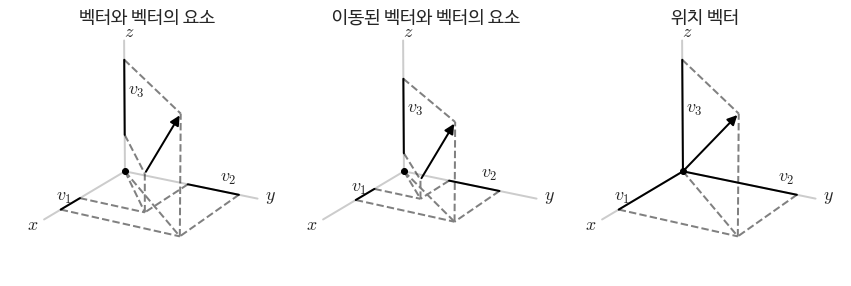

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
fig.set_size_inches((15,5))

ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax3 = fig.add_subplot(1, 3, 3, projection='3d')

ax1.xaxis.set_tick_params(labelsize=15)
ax1.yaxis.set_tick_params(labelsize=15)
ax1.zaxis.set_tick_params(labelsize=15)

ax2.xaxis.set_tick_params(labelsize=15)
ax2.yaxis.set_tick_params(labelsize=15)
ax2.zaxis.set_tick_params(labelsize=15)

ax3.xaxis.set_tick_params(labelsize=15)
ax3.yaxis.set_tick_params(labelsize=15)
ax3.zaxis.set_tick_params(labelsize=15)

x, y, z = 0, 1, 2
P = np.array([1.5, 1.8, 1])

Q = np.array([2.1, 3.2, 3])
O = (0, 0, 0)

axis_length = Q + 0.5

def draw_vector(ax, P, Q, elev, azim, title=''):
    
    arrow = Arrow3D([P[x], Q[x]], [P[y], Q[y]], [P[z], Q[z]], lw=2, color='k',
                   mutation_scale=20, arrowstyle="-|>" )
    ax.add_artist(arrow)
    ax.axis('off')
    
    ax.plot3D([Q[x], Q[x]], [0, Q[y]], [0,0], '--', color="gray")
    ax.plot3D([P[x], P[x]], [0, P[y]], [0,0], '--', color="gray")

    ax.plot3D([0, Q[x]], [Q[y], Q[y]], [0,0], '--', color="gray")
    ax.plot3D([0, P[x]], [P[y], P[y]], [0,0], '--', color="gray")

    ax.plot3D([P[x], P[x]], [P[y], P[y]], [0, P[z]], '--', color="gray") #p로의 세로선
    ax.plot3D([Q[x], Q[x]], [Q[y], Q[y]], [0, Q[z]], '--', color="gray") #p로의 세로선

    ax.plot3D([0, P[x]], [0, P[y]], [0,0], '--', color="gray")
    ax.plot3D([0, Q[x]], [0, Q[y]], [0,0], '--', color="gray")

    ax.plot3D([0, P[x]], [0, P[y]], [P[z], P[z]], '--', color="gray")
    ax.plot3D([0, Q[x]], [0, Q[y]], [Q[z], Q[z]], '--', color="gray")

    ax.plot3D([P[x], Q[x]], [0, 0], [0,0], lw=2, color='k')
    ax.plot3D([0,0], [P[y], Q[y]], [0,0],  lw=2, color='k')
    ax.plot3D([0,0], [0, 0], [P[z], Q[z]], lw=2, color='k')

    # 축 그리기 
    ax.plot3D([O[x], axis_length[0]], [0, 0], [0, 0], color='k', alpha=0.2)
    ax.text(axis_length[0]+0.5, 0, 0, '$x$', fontsize=18)
    
    ax.plot3D([0,0], [O[y], axis_length[1]], [0, 0], color='k', alpha=0.2)
    ax.text(0, axis_length[1]+0.2, 0, '$y$', fontsize=18)
    
    ax.plot3D([O[x], 0], [O[y], 0], [O[z], axis_length[2]], color='k', alpha=0.2)
    ax.text(0, 0, axis_length[2]+0.1, '$z$', fontsize=18)
    
    ax.plot([O[x]], [O[y]], [O[z]], 'o', color='k')

    # 콤포넌트 그리기
    ax.text(P[x]+(Q[x]-P[x])-0.3, -0.4, 0, '$v_1$', fontsize=18)
    ax.text(-0.4, P[y]+(Q[y]-P[y])-0.8, 0, '$v_2$', fontsize=18)
    ax.text(0, 0.1,  P[z]+(Q[y]-P[z])/2,   '$v_3$', fontsize=18)

    ax.set_title(title, fontproperties=fontprop)
    ax.set_xlabel('$x$', fontsize=20)
    ax.set_ylabel('$y$', fontsize=20)
    ax.set_zlabel('$z$', fontsize=20)
    
    ax.set_xlim((0, 2.5))
    ax.set_ylim((0, 3.5))
    ax.set_zlim((0, 3.5))
    
    ax.view_init(elev, azim)
    
draw_vector(ax1, P, Q, 20, 30, '벡터와 벡터의 요소')  
draw_vector(ax2, P-0.5, Q-0.5, 20, 30, '이동된 벡터와 벡터의 요소') 
draw_vector(ax3, O, Q, 20, 30, '위치 벡터') 

plt.subplots_adjust(hspace=0.05, wspace=0.0)

if file_print == True :
    fig.savefig("imgs/chap7/fig7-1.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap7/fig7-1.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

## 그림 7-2

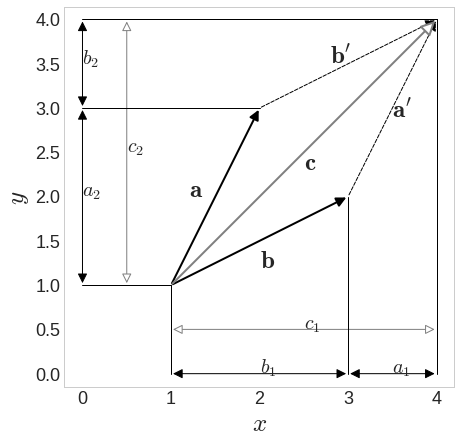

In [ ]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1, 1, 1)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel(r'$x$', fontsize=25)
ax.set_ylabel(r'$y$', fontsize=25)
ax.grid(False)

a = np.array( [[1, 1],[2, 3]] )
da = a[1]-a[0]

b = np.array( [[1, 1],[3, 2]] )
db = b[1]-b[0]


vec_a = FancyArrowPatch(a[0], a[1], lw=2, color='k', mutation_scale=20, arrowstyle="-|>")
ax.add_patch(vec_a)

vec_b = FancyArrowPatch(b[0], b[1], lw=2, color='k', mutation_scale=20, arrowstyle="-|>")
ax.add_patch(vec_b)

a_ = a + db # + db[1]
vec_a_ = FancyArrowPatch(a_[0], a_[1], lw=1, color='k', mutation_scale=20, arrowstyle="-|>", ls='--')
ax.add_patch(vec_a_)

b_ = b + da
vec_b_ = FancyArrowPatch(b_[0], b_[1], lw=1, color='k', mutation_scale=20, arrowstyle="-|>", ls='--')
ax.add_patch(vec_b_)

dc = da+db
c = a.copy()
c[1,:] = c[0,:]+dc
vec_c = FancyArrowPatch(c[0], c[1], lw=2, color='white', mutation_scale=30, arrowstyle="-|>", ec='gray')
ax.add_patch(vec_c)

# 가로 선
ax.plot( (0, a[0,0]),(a[0,1], a[0,1]), lw=1, color='k' )
ax.plot( (0, a[1,0]),(a[1,1], a[1,1]), lw=1, color='k' )
ax.plot( (0, a_[1,0]),(a_[1,1], a_[1,1]), lw=1, color='k' )

# 세로 선
ax.plot( (a[0,0], a[0,0]), (0, a[0,1]), lw=1, color='k' )
ax.plot( (b[1,0], b[1,0]), (0, b[1,1]), lw=1, color='k' )
ax.plot( (b_[1,0], b_[1,0]), (0, b_[1,1]), lw=1, color='k' )

vec_ay = FancyArrowPatch((0.0, a[0,1]), (0.0, a[1,1]), lw=1, mutation_scale=20, arrowstyle="<|-|>", color='k')
ax.add_patch(vec_ay)

vec_by = FancyArrowPatch((0.0, a[1,1]), (0.0, a[1,1]+db[1]), lw=1, mutation_scale=20, arrowstyle="<|-|>", color='k')
ax.add_patch(vec_by)

vec_cy = FancyArrowPatch((0.5,c[0,1]), (0.5,c[1,1]), lw=1, color='white', mutation_scale=20, arrowstyle="<|-|>", ec='gray')
ax.add_patch(vec_cy)

vec_ax = FancyArrowPatch((a[0,0], 0.0), (b[1,0], 0.0), lw=1, mutation_scale=20, arrowstyle="<|-|>", color='k')
ax.add_patch(vec_ax)

vec_bx = FancyArrowPatch((b[1,0], 0.0), (a[1,1]+da[0], 0.0), lw=1, mutation_scale=20, arrowstyle="<|-|>", color='k')
ax.add_patch(vec_bx)

vec_cx = FancyArrowPatch((c[0,0],0.5), (c[1,0],0.5), lw=1, color='white', mutation_scale=20, arrowstyle="<|-|>", ec='gray')
ax.add_patch(vec_cx)

ax.text(1.2, 2, r"$\mathbf{a}$", fontsize=25)
ax.text(3.5, 2.9, r"$\mathbf{a}'$", fontsize=25)
ax.text(2, 1.2, r"$\mathbf{b}$", fontsize=25)
ax.text(2.8, 3.5, r"$\mathbf{b}'$", fontsize=25)
ax.text(2.5, 2.3, r"$\mathbf{c}$", fontsize=25)

ax.text(0.5, 2.5, r"$c_2$", fontsize=20)
ax.text(0.0, 2.0, r"$a_2$", fontsize=20)
ax.text(0.0, 3.5, r"$b_2$", fontsize=20)

ax.text(2.5, 0.5, r"$c_1$", fontsize=20)
ax.text(2.0, 0.0, r"$b_1$", fontsize=20)
ax.text(3.5, 0.0, r"$a_1$", fontsize=20)

plt.axis('equal')

if file_print == True :
    fig.savefig("imgs/chap7/fig7-2.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap7/fig7-2.pdf", format='pdf', bbox_inches='tight')
    
    
plt.show()

## 그림 7-3

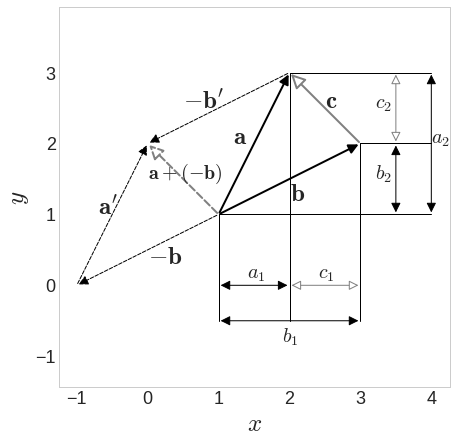

In [ ]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1, 1, 1)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel(r'$x$', fontsize=25)
ax.set_ylabel(r'$y$', fontsize=25)
ax.grid(False)

a = np.array( [[1, 1],[2, 3]] )
da = a[1]-a[0]

b = np.array( [[1, 1],[3, 2]] )
db = b[1]-b[0]

vec_a = FancyArrowPatch(a[0], a[1], lw=2, color='k', mutation_scale=20, arrowstyle="-|>")
ax.add_patch(vec_a)

vec_b = FancyArrowPatch(b[0], b[1], lw=2, color='k', mutation_scale=20, arrowstyle="-|>")
ax.add_patch(vec_b)

minus_b = b.copy()
minus_b[1,:] = minus_b[0,:]-db
vec_minus_b = FancyArrowPatch(minus_b[0], minus_b[1], ls='--', lw=1, color='k', mutation_scale=20, arrowstyle="-|>")
ax.add_patch(vec_minus_b)

a_ = a - db # + db[1]
vec_a_ = FancyArrowPatch(a_[0], a_[1], lw=1, color='k', mutation_scale=20, arrowstyle="-|>", ls='--')
ax.add_patch(vec_a_)

b_ = minus_b + da
vec_b_ = FancyArrowPatch(b_[0], b_[1], lw=1, color='k', mutation_scale=20, arrowstyle="-|>", ls='--')
ax.add_patch(vec_b_)

db_ = minus_b[1]-minus_b[0]
dc_ = da+db_
c_ = a.copy()
c_[1,:] = c_[0,:]+dc_
vec_c_ = FancyArrowPatch(c_[0], c_[1], lw=2, color='white', mutation_scale=30, arrowstyle="-|>", ec='gray', ls='--')
ax.add_patch(vec_c_)

dc = da-db
c = b.copy()
c[0,:] = c[1,:]
c[1,:] = c[0,:]+dc

vec_c = FancyArrowPatch(c[0], c[1], lw=2, color='white', mutation_scale=30, arrowstyle="-|>", ec='gray')
ax.add_patch(vec_c)

# 세로 선
ax.plot( (a[0,0], a[0,0]), (-0.5, a[0,1]), lw=1, color='k' )
ax.plot( (a[1,0], a[1,0]), (-0.5, a[1,1]), lw=1, color='k' )
ax.plot( (b[1,0], b[1,0]), (-0.5, b[1,1]), lw=1, color='k' )

# 가로 선
ax.plot( (a[0,0], 4), (a[0,1], a[0,1]), lw=1, color='k' )
ax.plot( (b[1,0], 4), (b[1,1], b[1,1]), lw=1, color='k' )
ax.plot( (a[1,0], 4), (a[1,1], a[1,1]), lw=1, color='k' )

vec_ay = FancyArrowPatch((4.0, a[0,1]), (4.0, a[1,1]), lw=1, mutation_scale=20, arrowstyle="<|-|>", color='k')
ax.add_patch(vec_ay)

vec_by = FancyArrowPatch((3.5, b[0,1]), (3.5, b[1,1]), lw=1, mutation_scale=20, arrowstyle="<|-|>", color='k')
ax.add_patch(vec_by)

vec_cy = FancyArrowPatch((3.5, c[0,1]), (3.5,c[1,1]), lw=1, color='white', mutation_scale=20, arrowstyle="<|-|>", ec='gray')
ax.add_patch(vec_cy)

vec_bx = FancyArrowPatch((a[0,0], -0.5), (b[1,0], -0.5), lw=1, mutation_scale=20, arrowstyle="<|-|>", color='k')
ax.add_patch(vec_bx)

vec_ax = FancyArrowPatch((a[0,0], 0.0), (a[1,0], 0.0), lw=1, mutation_scale=20, arrowstyle="<|-|>", color='k')
ax.add_patch(vec_ax)

vec_cx = FancyArrowPatch((c[0,0],0.0), (c[1,0],0.0), lw=1, color='white', mutation_scale=20, arrowstyle="<|-|>", ec='gray')
ax.add_patch(vec_cx)

ax.text(1.2, 2, r"$\mathbf{a}$", fontsize=25)
ax.text(-0.7, 1.0, r"$\mathbf{a}'$", fontsize=25)
ax.text(2, 1.2, r"$\mathbf{b}$", fontsize=25)
ax.text(0, 0.3, r"$-\mathbf{b}$", fontsize=25)
ax.text(0.5, 2.5, r"$-\mathbf{b}'$", fontsize=25)

ax.text(2.4, 0.1, r"$c_1$", fontsize=20)
ax.text(1.4, 0.1, r"$a_1$", fontsize=20)
ax.text(1.9, -0.8, r"$b_1$", fontsize=20)

ax.text(3.2, 2.5, r"$c_2$", fontsize=20)
ax.text(4.0, 2.0, r"$a_2$", fontsize=20)
ax.text(3.2, 1.5, r"$b_2$", fontsize=20)

ax.text(0, 1.5, r"$\mathbf{a}+(-\mathbf{b})$", fontsize=20)
ax.text(2.5, 2.5, r"$\mathbf{c}$", fontsize=25)

plt.axis('equal')

if file_print == True :
    fig.savefig("imgs/chap7/fig7-3.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap7/fig7-3.pdf", format='pdf', bbox_inches='tight')
    
    
plt.show()

## 그림 7-4

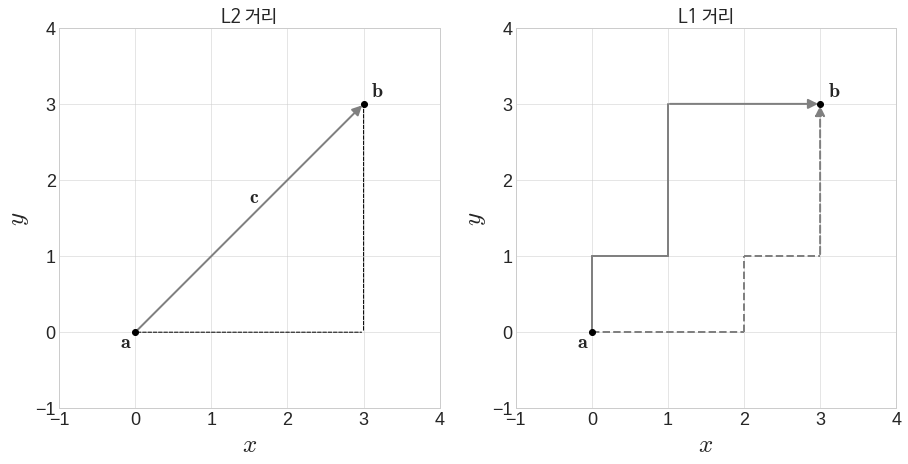

In [ ]:
fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.xaxis.set_tick_params(labelsize=18)
ax1.yaxis.set_tick_params(labelsize=18)
ax1.set_xlabel(r'$x$', fontsize=25)
ax1.set_ylabel(r'$y$', fontsize=25)

ax2.xaxis.set_tick_params(labelsize=18)
ax2.yaxis.set_tick_params(labelsize=18)
ax2.set_xlabel(r'$x$', fontsize=25)
ax2.set_ylabel(r'$y$', fontsize=25)

a = np.array([0, 0])
b = np.array([3, 3])
vec_a = FancyArrowPatch((0, 0), (3, 0) , lw=1, mutation_scale=20, arrowstyle="-", color='k', ls='--')
ax1.add_patch(vec_a)

vec_b = FancyArrowPatch((3, 0), (3, 3) , lw=1, mutation_scale=20, arrowstyle="-", color='k', ls='--')
ax1.add_patch(vec_b)

c = np.array( [a, b] )
dc = c[1]-c[0]
vec_c = FancyArrowPatch(c[0], c[1], lw=2, mutation_scale=20, arrowstyle="-|>", color='gray')
ax1.add_patch(vec_c)

ax1.plot(*a, 'o', color='k')
ax1.plot(*b, 'o', color='k')

ax1.text(-0.2,-0.2, r"$\mathbf{a}$", fontsize=20)
ax1.text(3.1, 3.1, r"$\mathbf{b}$", fontsize=20)
ax1.text(1.5, 1.7, r"$\mathbf{c}$", fontsize=20)
ax1.set_title("L2 거리", fontsize=20, fontproperties=fontprop)
ax1.set_xlim(-1, 4)
ax1.set_ylim(-1, 4)

ax2.plot((0, 0), (0, 1), lw=2, color='gray')
ax2.plot((0, 1), (1, 1), lw=2, color='gray')
ax2.plot((1, 1), (1, 3), lw=2, color='gray')
# ax2.plot((1, 3), (3, 3), lw=2, color='gray')
vec_a = FancyArrowPatch((1, 3), (3, 3) , lw=2, mutation_scale=20, arrowstyle="-|>", color='gray')
ax2.add_patch(vec_a)

ax2.plot((0, 2), (0, 0), lw=2, ls='--', color='gray')
ax2.plot((2, 2), (0, 1), lw=2, ls='--', color='gray')
ax2.plot((2, 3), (1, 1), lw=2, ls='--', color='gray')
vec_b = FancyArrowPatch((3, 1), (3, 3) , lw=2, mutation_scale=20, ls='--', arrowstyle="-|>", color='gray')
ax2.add_patch(vec_b)

ax2.plot(*a, 'o', color='k')
ax2.plot(*b, 'o', color='k')
ax2.text(-0.2,-0.2, r"$\mathbf{a}$", fontsize=20)
ax2.text(3.1, 3.1, r"$\mathbf{b}$", fontsize=20)
ax2.set_title("L1 거리", fontsize=20, fontproperties=fontprop)
ax2.set_xlim(-1, 4)
ax2.set_ylim(-1, 4)

if file_print == True :
    fig.savefig("imgs/chap7/fig7-4.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap7/fig7-4.pdf", format='pdf', bbox_inches='tight')

plt.show()

## 그림 7-5

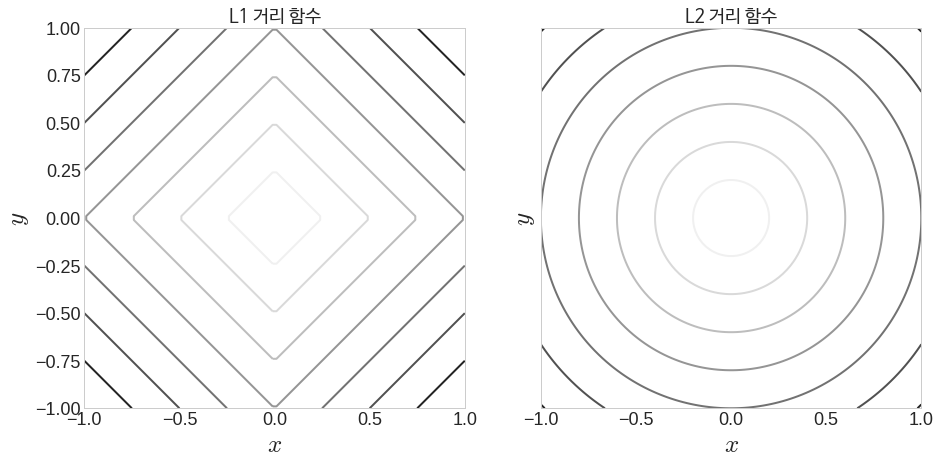

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
fig.set_size_inches((15,7))

ax1.xaxis.set_tick_params(labelsize=18)
ax1.yaxis.set_tick_params(labelsize=18)
ax1.set_xlabel(r'$x$', fontsize=25)
ax1.set_ylabel(r'$y$', fontsize=25)
ax1.grid(False)

ax2.xaxis.set_tick_params(labelsize=18)
ax2.yaxis.set_tick_params(labelsize=18)
ax2.set_xlabel(r'$x$', fontsize=25)
ax2.set_ylabel(r'$y$', fontsize=25)
ax2.grid(False)

l1 = lambda x1, x2 : np.abs(x1) + np.abs(x2)
l2 = lambda x1, x2 : np.sqrt(x1**2 + x2**2)

x = np.linspace(-1, 1, 100)
X1, X2 = np.meshgrid(x, x)

L1 = l1(X1,X2)
L2 = l2(X1,X2)

ax1.contour(X1, X2, L1)
ax1.set_title("L1 거리 함수", fontsize=20, fontproperties=fontprop)
ax1.axis('equal')

ax2.contour(X1, X2, L2)
ax2.set_title("L2 거리 함수", fontsize=20, fontproperties=fontprop)
ax2.axis('equal')

if file_print == True :
    fig.savefig("imgs/chap7/fig7-5.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap7/fig7-5.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

## 그림 7-6

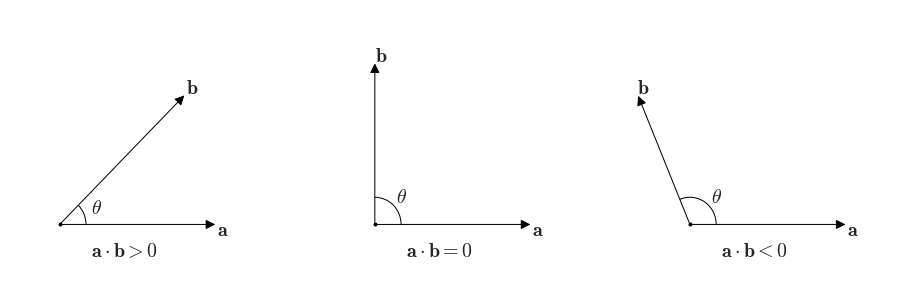

In [ ]:
fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)


a = np.array([(1, 0.5), (2.5, 0.5)])
da = a[1]-a[0]
vec_a = FancyArrowPatch(a[0], a[1], lw=1, 
                        color='k', mutation_scale=20, arrowstyle="-|>")
ax1.add_patch(vec_a)

b = np.array([(1, 0.5), (2.2, 1.7)])
db = b[1]-b[0]
vec_b = FancyArrowPatch(b[0], b[1], lw=1, 
                        color='k', mutation_scale=20, arrowstyle="-|>")
ax1.add_patch(vec_b)
ax1.plot(*a[0], '.', color='k')

theta = 180*np.arccos(np.dot(da,db) / (np.linalg.norm(da)*np.linalg.norm(db)))/np.pi
e = Arc((1, 0.5), 0.5, 0.5, angle=0, theta1=0, theta2=theta,
        color='k',linewidth=1, fill=False, zorder=2)
ax1.add_patch(e)
ax1.text(1.3, 0.6, r"$\theta$", fontsize=20)
ax1.text(2.5, 0.4, r"$\mathbf{a}$", fontsize=20)
ax1.text(2.2, 1.7, r"$\mathbf{b}$", fontsize=20)
ax1.text(1.3, 0.2, r"$\mathbf{a}\cdot\mathbf{b}>0$", fontsize=20)
ax1.axis('off')
ax1.set_xlim(0.5, 3)
ax1.set_ylim(0, 2.5)

##################################################################################
a = np.array([(1, 0.5), (2.5, 0.5)])
da = a[1]-a[0]
vec_a = FancyArrowPatch(a[0], a[1], lw=1, 
                        color='k', mutation_scale=20, arrowstyle="-|>")
ax2.add_patch(vec_a)

b = np.array([(1, 0.5), (1, 2.)])
db = b[1]-b[0]
vec_b = FancyArrowPatch(b[0], b[1], lw=1, 
                        color='k', mutation_scale=20, arrowstyle="-|>")
ax2.add_patch(vec_b)
ax2.plot(*a[0], '.', color='k')

theta = 180*np.arccos(np.dot(da,db) / (np.linalg.norm(da)*np.linalg.norm(db)))/np.pi
e = Arc((1, 0.5), 0.5, 0.5, angle=0, theta1=0, theta2=theta,
        color='k',linewidth=1, fill=False, zorder=2)
ax2.add_patch(e)
ax2.text(1.2, 0.7, r"$\theta$", fontsize=20)
ax2.text(2.5, 0.4, r"$\mathbf{a}$", fontsize=20)
ax2.text(1, 2, r"$\mathbf{b}$", fontsize=20)
ax2.text(1.3, 0.2, r"$\mathbf{a}\cdot\mathbf{b}=0$", fontsize=20)
ax2.axis('off')
ax2.set_xlim(0.5, 3)
ax2.set_ylim(0, 2.5)

##################################################################################
a = np.array([(1, 0.5), (2.5, 0.5)])
da = a[1]-a[0]
vec_a = FancyArrowPatch(a[0], a[1], lw=1, 
                        color='k', mutation_scale=20, arrowstyle="-|>")
ax3.add_patch(vec_a)

b = np.array([(1, 0.5), (0.5, 1.7)])
db = b[1]-b[0]
vec_b = FancyArrowPatch(b[0], b[1], lw=1, 
                        color='k', mutation_scale=20, arrowstyle="-|>")
ax3.add_patch(vec_b)
ax3.plot(*a[0], '.', color='k')

theta = 180*np.arccos(np.dot(da,db) / (np.linalg.norm(da)*np.linalg.norm(db)))/np.pi
e = Arc((1, 0.5), 0.5, 0.5, angle=0, theta1=0, theta2=theta,
        color='k',linewidth=1, fill=False, zorder=2)
ax3.add_patch(e)
ax3.text(1.2, 0.7, r"$\theta$", fontsize=20)
ax3.text(2.5, 0.4, r"$\mathbf{a}$", fontsize=20)
ax3.text(0.5, 1.7, r"$\mathbf{b}$", fontsize=20)
ax3.text(1.3, 0.2, r"$\mathbf{a}\cdot\mathbf{b}<0$", fontsize=20)
ax3.axis('off')
ax3.set_xlim(0.5, 3)
ax3.set_ylim(0, 2.5)

if file_print == True :
    fig.savefig("imgs/chap7/fig7-6.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap7/fig7-6.pdf", format='pdf', bbox_inches='tight')

plt.show()

In [ ]:
def cube2d(ax, origin, dx=1, dy=1, dc=0.1, axis='off', hidden=False):
    x0, y0 = origin
    
    if hidden==False:
        ax.plot((x0, x0+dx), (y0, y0), lw=2, color='k')
        ax.plot((x0+dx, x0+dx), (y0, y0+dy), lw=2, color='k')
        ax.plot((x0+dx, x0), (y0+dy, y0+dy), lw=2, color='k')
        ax.plot((x0, x0), (y0+dy, y0), lw=2, color='k')

    ax.plot((x0, x0+dc), (y0+dy, y0+dy+dc), lw=2, color='k')
    ax.plot((x0+dx, x0+dx+dc), (y0+dy, y0+dy+dc), lw=2, color='k')
    ax.plot((x0+dx, x0+dx+dc), (y0, y0+dc), lw=2, color='k')
    
    ax.plot((x0+dc, x0+dx+dc), (y0+dy+dc, y0+dy+dc), lw=2, color='k')
    ax.plot((x0+dc, x0+dx+dc), (y0+dy+dc, y0+dy+dc), lw=2, color='k')
    ax.plot((x0+dx+dc, x0+dx+dc), (y0+dy+dc, y0+dc), lw=2, color='k')
    
    ax.axis(axis)

# 행렬을 이용한 데이터 표현

## 그림 7-7

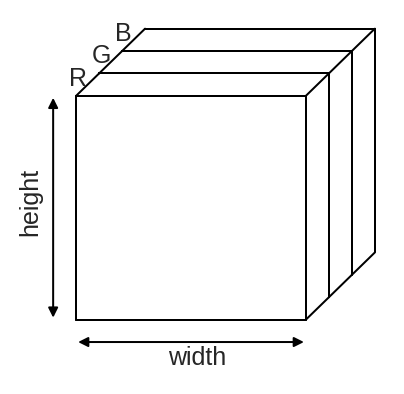

In [ ]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1, 1, 1)
    
cube2d(ax, (0, 0))
cube2d(ax, (0.1, 0.1), hidden=True)
cube2d(ax, (0.2, 0.2), hidden=True)

width = FancyArrowPatch((0, -0.1), (1, -0.1), lw=2,  mutation_scale=20, arrowstyle="<|-|>", color='k')
ax.add_patch(width)

height = FancyArrowPatch((-0.1, 0), (-0.1, 1), lw=2,  mutation_scale=20, arrowstyle="<|-|>", color='k')
ax.add_patch(height)

ax.text(0.4, -0.2, "width", fontsize=25)
ax.text(-0.25, 0.4, "height", fontsize=25, rotation=90)

ax.text(-0.03, 1.05, "R", fontsize=25)
ax.text(0.07, 1.15, "G", fontsize=25)
ax.text(0.17, 1.25, "B", fontsize=25)

ax.set_xlim(-0.3, 1.4)
ax.set_ylim(-0.3, 1.4)

if file_print == True :
    fig.savefig("imgs/chap7/fig7-7.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap7/fig7-7.pdf", format='pdf', bbox_inches='tight')

plt.show()

## 그림 7-8

(256, 272, 4)


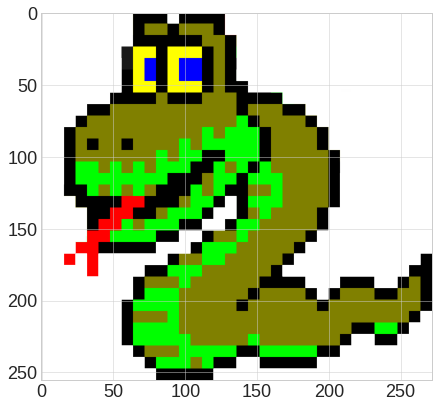

In [ ]:
im = plt.imread("noviceml/img/old_python.png")
print(im.shape)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1, 1, 1)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)

ax.imshow(im)

if file_print == True :
    fig.savefig("imgs/chap7/fig7-8.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap7/fig7-8.pdf", format='pdf', bbox_inches='tight')

## 그림 7-9

In [ ]:
R = im[:,:,0]
G = im[:,:,1]
B = im[:,:,2]
A = im[:,:,3]

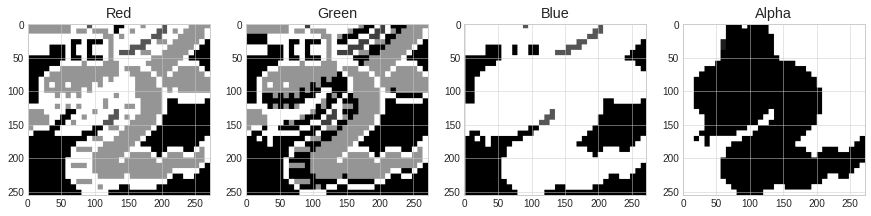

In [ ]:
fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(1, 4, 1)
ax2 = fig.add_subplot(1, 4, 2)
ax3 = fig.add_subplot(1, 4, 3)
ax4 = fig.add_subplot(1, 4, 4)

ax1.imshow(R)
ax1.set_title("Red")
ax2.imshow(G)
ax2.set_title("Green")
ax3.imshow(B)
ax3.set_title("Blue")
ax4.imshow(A)
ax4.set_title("Alpha")

plt.show()

if file_print == True :
    fig.savefig("imgs/chap7/fig7-9.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap7/fig7-9.pdf", format='pdf', bbox_inches='tight')



## 문서를 행렬로 표현하기

In [ ]:
docs = [
'This is the first document',
'This is the second document',
'And the third one',
'Is this the first document']

V = ['<NULL>', 'and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']

In [ ]:
pre_docs = list(map(lambda x : x.lower().split(), docs))
pre_docs

D = [[V.index(w) for w in doc] for doc in pre_docs ]

print(D)


[[9, 4, 7, 3, 2], [9, 4, 7, 6, 2], [1, 7, 8, 5], [4, 9, 7, 3, 2]]


In [ ]:
N = max([len(doc) for doc in pre_docs])

In [ ]:
N

5

In [ ]:
N = max([len(doc) for doc in pre_docs]) #-----[1]
pre_docs = [doc + ['<NULL>']*(N-len(doc)) for doc in pre_docs] #-----[2]
pre_docs


[['this', 'is', 'the', 'first', 'document'],
 ['this', 'is', 'the', 'second', 'document'],
 ['and', 'the', 'third', 'one', '<NULL>'],
 ['is', 'this', 'the', 'first', 'document']]

In [ ]:
D = [[V.index(w) for w in doc] for doc in pre_docs ]
D = np.array(D)
D

array([[9, 4, 7, 3, 2],
       [9, 4, 7, 6, 2],
       [1, 7, 8, 5, 0],
       [4, 9, 7, 3, 2]])

# 넘파이

## 그림 7-10

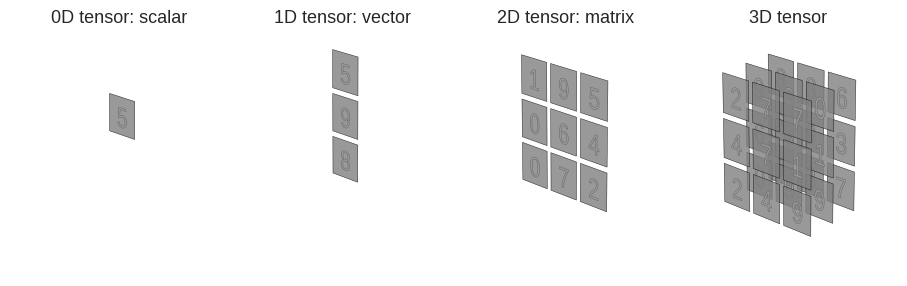

In [ ]:
fig = plt.figure(figsize=(16,5))

np.random.seed(1)

ax1 = fig.add_subplot(141, projection='3d')
ax2 = fig.add_subplot(142, projection='3d')
ax3 = fig.add_subplot(143, projection='3d')
ax4 = fig.add_subplot(144, projection='3d')

k = 2.3
rx, ry = 2, 2

###############################################################################################
offset_x, offset_y, offset_z = 0, 0, 1.5
d = 5
i = 0
j = 1

text3d(ax1, (i*k+offset_x+.6, d+offset_z, j*k+offset_y+.4), "{}".format(np.random.randint(10)), 
       zdir="y", size=1.5, usetex=True, ec="k", fc="#FFFFFF")
bottom, left = i*k+offset_x, j*k+offset_y
rect = Rectangle((bottom, left), rx, ry, alpha=.8, facecolor='gray', edgecolor='k')
ax1.add_patch(rect)
art3d.pathpatch_2d_to_3d(rect, z=d+offset_z, zdir='y')
            
ax1.set_xlim(0, 7)
ax1.set_ylim(0, 7)
ax1.set_zlim(0, 7)
ax1.view_init(20, -50)
ax1.set_title("0D tensor: scalar", fontsize=18)
ax1.axis('off')
###############################################################################################

###############################################################################################
offset_x, offset_y, offset_z = 0, 0, 1.5
d = 5
i = 0

for j in range(3):
    text3d(ax2, (i*k+offset_x+.6, d+offset_z, j*k+offset_y+.4), "{}".format(np.random.randint(10)), 
           zdir="y", size=1.5, usetex=True, ec="k", fc="#FFFFFF")
    bottom, left = i*k+offset_x, j*k+offset_y
    rect = Rectangle((bottom, left), rx, ry, alpha=.8, facecolor='gray', edgecolor='k')
    ax2.add_patch(rect)
    art3d.pathpatch_2d_to_3d(rect, z=d+offset_z, zdir='y')
            
ax2.set_xlim(0, 7)
ax2.set_ylim(0, 7)
ax2.set_zlim(0, 7)
ax2.view_init(20, -50)
ax2.set_title("1D tensor: vector", fontsize=18)
ax2.axis('off')
###############################################################################################

###############################################################################################
offset_x, offset_y, offset_z = -1, 0, 1.5
d = 3

for i in range(3):
    for j in range(3):
        text3d(ax3, (i*k+offset_x+.6, d+offset_z, j*k+offset_y+.4), "{}".format(np.random.randint(10)), 
               zdir="y", size=1.5, usetex=True, ec="k", fc="#FFFFFF")
        bottom, left = i*k+offset_x, j*k+offset_y
        rect = Rectangle((bottom, left), rx, ry, alpha=.8, facecolor='gray', edgecolor='k')
        ax3.add_patch(rect)
        art3d.pathpatch_2d_to_3d(rect, z=d+offset_z, zdir='y')
            
ax3.set_xlim(0, 7)
ax3.set_ylim(0, 7)
ax3.set_zlim(0, 7)
ax3.view_init(20, -50)
ax3.set_title("2D tensor: matrix", fontsize=18)
ax3.axis('off')
###############################################################################################

###############################################################################################
offset_x, offset_y, offset_z = 0, 0, 1.5

for d in range(0, 5, 2):
    for i in range(3):
        for j in range(3):
            # print(d)
            text3d(ax4, (i*k+offset_x+.6, d+offset_z, j*k+offset_y+.4), "{}".format(np.random.randint(10)), 
                   zdir="y", size=1.5, usetex=True, ec="k", fc="#FFFFFF")
            bottom, left = i*k+offset_x, j*k+offset_y
            rect = Rectangle((bottom, left), rx, ry, alpha=.8, facecolor='gray', edgecolor='k')
            ax4.add_patch(rect)
            art3d.pathpatch_2d_to_3d(rect, z=d+offset_z, zdir='y')
            
ax4.set_xlim(0, 7)
ax4.set_ylim(0, 7)
ax4.set_zlim(0, 7)
ax4.view_init(20, -50)
ax4.set_title("3D tensor", fontsize=18)
ax4.axis('off')
###############################################################################################


plt.subplots_adjust(hspace=0.05, wspace=0.0)

if file_print == True :
    fig.savefig("imgs/chap7/fig7-10.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap7/fig7-10.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

## 넘파이 어레이ndarray

In [ ]:
A = np.array([1,2,3,4])
A


array([1, 2, 3, 4])

In [ ]:
B = np.array([[1,2],[3,4]])
B


array([[1, 2],
       [3, 4]])

In [ ]:
A.shape

(4,)

In [ ]:
B.shape

(2, 2)

In [ ]:
A.reshape(1,4)

array([[1, 2, 3, 4]])

In [ ]:
A.reshape(1,4).shape

(1, 4)

In [ ]:
A.reshape(4,1)

array([[1],
       [2],
       [3],
       [4]])

In [ ]:
A.reshape(4,1).shape

(4, 1)

In [ ]:
np.random.rand(3,2) # 0에서 1사이의 무작위 소수로 채워진 3행 2열 ndarray 생성

array([[0.9579, 0.5332],
       [0.6919, 0.3155],
       [0.6865, 0.8346]])

In [ ]:
np.ones((3,2)) # 모두 1로 채워진 3행 2열 ndarray 생성

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

In [ ]:
np.ones_like(A) # A라는 ndarray와 모양은 같고 모두 1로 채워진 ndarray 생성

array([1, 1, 1, 1])

In [ ]:
np.zeros((3,2)) # 모두 0으로 채워진 3행 2열 ndarray 생성

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [ ]:
np.zeros_like(A) # A라는 ndarray와 모양은 같고 모두 0으로 채워진 ndarray 생성

array([0, 0, 0, 0])

In [ ]:
np.full((3,2), 10) # 모두 10으로 채워진 3행 2열 ndarray 생성

array([[10, 10],
       [10, 10],
       [10, 10]])

In [ ]:
np.arange(10) # 0부터 9까지 순차적인 자연수로 ndarray를 생성

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## 넘파이 어레이 연산

In [ ]:
np.random.seed(12)

A = np.random.randint(0,9,4).reshape(2,2)
B = np.random.randint(0,9,4).reshape(2,2)+1

In [ ]:
A

array([[6, 1],
       [2, 3]])

In [ ]:
B

array([[4, 1],
       [7, 2]])

In [ ]:
A+B

array([[10,  2],
       [ 9,  5]])

In [ ]:
A-B

array([[ 2,  0],
       [-5,  1]])

In [ ]:
A/B

array([[1.5   , 1.    ],
       [0.2857, 1.5   ]])

In [ ]:
A*B

array([[24,  1],
       [14,  6]])

In [ ]:
np.dot(A,B)

array([[31,  8],
       [29,  8]])

In [ ]:
def cube2d2(ax, origin, dx=1, dy=1, dc=0.1, label='', fc=10, la=1.0, 
            hidden=(None,), **kwargs):
    x0, y0 = origin
    
    if 'F' not in hidden : # hidden !='F':
        ax.plot((x0, x0+dx), (y0, y0), **kwargs)                   # F,아래쪽
        if 'L' not in hidden : #hidden!='L':
            ax.plot((x0, x0), (y0+dy, y0), **kwargs)               # F, 왼쪽
        if 'U' not in hidden : #hidden!='U':
            ax.plot((x0+dx, x0), (y0+dy, y0+dy), **kwargs)         # F, 위쪽
        if 'R' not in hidden :# hidden!='R':
            ax.plot((x0+dx, x0+dx), (y0, y0+dy), **kwargs)         # F, 오른쪽
    
    if 'U' not in hidden : # hidden!='U':
        ax.plot((x0+dc, x0+dx+dc), (y0+dy+dc, y0+dy+dc), **kwargs)     # U, 위쪽
        if 'L' not in hidden : # hidden!='L':
            ax.plot((x0, x0+dc), (y0+dy, y0+dy+dc), **kwargs)          # U, 왼쪽
        if 'R' not in hidden : # hidden!='R':
            ax.plot((x0+dx, x0+dx+dc), (y0+dy, y0+dy+dc), **kwargs)    # U, 오른쪽
    
    if 'R+' not in hidden and 'R' not in hidden : # hidden!='R':
        ax.plot((x0+dx, x0+dx+dc), (y0, y0+dc), **kwargs)          # R, 아래쪽
        ax.plot((x0+dx+dc, x0+dx+dc), (y0+dy+dc, y0+dc), **kwargs) # R, 오른쪽
    
    ax.text(x0 + 0.5 * dx, y0 + 0.5 * dy, label,
            ha='center', va='center', fontsize=fc, alpha=la)
    
box_solid  = dict(c='k', lw=2, alpha=1.0,)
box_gray   = dict(c='k', lw=2, alpha=0.2,)

## 그림 7-11

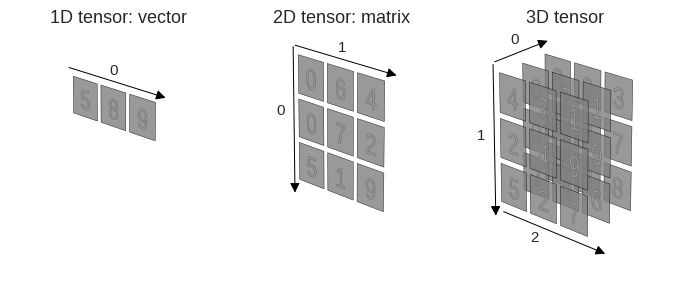

In [ ]:
fig = plt.figure(figsize=(16,5))

np.random.seed(1)

ax1 = fig.add_subplot(141, projection='3d')
ax2 = fig.add_subplot(142, projection='3d')
ax3 = fig.add_subplot(143, projection='3d')

k = 2.3
rx, ry = 2, 2
axis_length = 8

###############################################################################################
offset_x, offset_y, offset_z = -3, -2, 1.5
d = 5
i = 0
j = 2
for i in range(3):
    text3d(ax1, (i*k+offset_x+.6, d+offset_z, j*k+offset_y+.4), "{}".format(np.random.randint(10)), 
           zdir="y", size=1.5, usetex=True, ec="k", fc="#FFFFFF")
    bottom, left = i*k+offset_x, j*k+offset_y
    rect = Rectangle((bottom, left), rx, ry, alpha=.8, facecolor='gray', edgecolor='k')
    ax1.add_patch(rect)
    art3d.pathpatch_2d_to_3d(rect, z=d+offset_z, zdir='y')

axis0 = Arrow3D([offset_x-0.5, offset_x-0.5+axis_length], [d+offset_z, d+offset_z], [d, d], 
                mutation_scale=20, lw=1, arrowstyle="-|>", color="k")
ax1.add_artist(axis0)

ax1.text(offset_x-1+axis_length/2, d+offset_z, d+0.3, "0", fontsize=15)

ax1.set_xlim(0, 7)
ax1.set_ylim(0, 7)
ax1.set_zlim(0, 7)
ax1.set_xlabel('x')
ax1.view_init(20, -50)
# ax1.view_init(0, -90)
ax1.set_title("1D tensor: vector", fontsize=18)
ax1.axis('off')
###############################################################################################

###############################################################################################
offset_x, offset_y, offset_z = -1, 0, 1.5
d = 3
for i in range(3):
    for j in range(3):
        text3d(ax2, (i*k+offset_x+.6, d+offset_z, j*k+offset_y+.4), "{}".format(np.random.randint(10)), 
               zdir="y", size=1.5, usetex=True, ec="k", fc="#FFFFFF")
        bottom, left = i*k+offset_x, j*k+offset_y
        rect = Rectangle((bottom, left), rx, ry, alpha=.8, facecolor='gray', edgecolor='k')
        ax2.add_patch(rect)
        art3d.pathpatch_2d_to_3d(rect, z=d+offset_z, zdir='y')

axis0 = Arrow3D([offset_x-0.5, offset_x-0.5], [left, left], [d+axis_length/2, d-axis_length/2], 
                mutation_scale=20, lw=1, arrowstyle="-|>", color="k")
ax2.add_artist(axis0)
ax2.text(offset_x-2, left, d, "0", fontsize=15)

axis1 = Arrow3D([offset_x-0.5, offset_x-0.5+axis_length], [left, left], [d+axis_length/2, d+axis_length/2], 
                mutation_scale=20, lw=1, arrowstyle="-|>", color="k")
ax2.add_artist(axis1)
ax2.text(offset_x-1+axis_length/2, left, d+axis_length/2+0.3, "1", fontsize=15)


ax2.set_xlim(0, 7)
ax2.set_ylim(0, 7)
ax2.set_zlim(0, 7)
ax2.view_init(20, -50)
# ax2.view_init(0, -90)
ax2.set_title("2D tensor: matrix", fontsize=18)
ax2.axis('off')
###############################################################################################

###############################################################################################
offset_x, offset_y, offset_z = 0, 0, 1.5

for d in range(0, 5, 2):
    for i in range(3):
        for j in range(3):
            text3d(ax3, (i*k+offset_x+.6, d+offset_z, j*k+offset_y+.4), "{}".format(np.random.randint(10)), 
                   zdir="y", size=1.5, usetex=True, ec="k", fc="#FFFFFF")
            bottom, left = i*k+offset_x, j*k+offset_y
            rect = Rectangle((bottom, left), rx, ry, alpha=.8, facecolor='gray', edgecolor='k')
            ax3.add_patch(rect)
            art3d.pathpatch_2d_to_3d(rect, z=d+offset_z, zdir='y')


axis0 = Arrow3D([offset_x-0.5, offset_x-0.5], [0+offset_z, 0+offset_z+5], [3+axis_length/2, 3+axis_length/2], 
                mutation_scale=20, lw=1, arrowstyle="-|>", color="k", zorder=10)
ax3.add_artist(axis0)
ax3.text(offset_x, offset_z+1, 3.8+axis_length/2, "0", fontsize=15)

axis1 = Arrow3D([offset_x-0.5, offset_x-0.5], [0+offset_z, 0+offset_z], [3+axis_length/2, 3-axis_length/2], 
                mutation_scale=20, lw=1, arrowstyle="-|>", color="k", zorder=10)
ax3.add_artist(axis1)
ax3.text(offset_x-0.5, 0, 3.5, "1", fontsize=15)

axis2 = Arrow3D([offset_x, offset_x+axis_length], [0+offset_z, 0+offset_z], [0-0.5, 0-0.5], 
                mutation_scale=20, lw=1, arrowstyle="-|>", color="k", zorder=10)
ax3.add_artist(axis2)
ax3.text(offset_x+0.5+axis_length/2, -1, 0, "2", fontsize=15)

ax3.set_xlim(0, 7)
ax3.set_ylim(0, 7)
ax3.set_zlim(0, 7)
ax3.view_init(20, -50)
# ax3.view_init(0, 0)
ax3.set_title("3D tensor", fontsize=18)
ax3.axis('off')
###############################################################################################

plt.subplots_adjust(hspace=0.05, wspace=0.0)

if file_print == True :
    fig.savefig("imgs/chap7/fig7-11.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap7/fig7-11.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

### 축 순서 바꾸기

In [ ]:
A = np.arange(1, 7).reshape(2, 3) 
A


array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
A.transpose(1, 0) 

array([[1, 4],
       [2, 5],
       [3, 6]])

In [ ]:
A = np.arange(1, 13).reshape(2, 2, -1)
A

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [ ]:
A.T

array([[[ 1,  7],
        [ 4, 10]],

       [[ 2,  8],
        [ 5, 11]],

       [[ 3,  9],
        [ 6, 12]]])

In [ ]:
A = np.arange(1, 13).reshape(2, 2, -1)
A.transpose(1,0,2)


array([[[ 1,  2,  3],
        [ 7,  8,  9]],

       [[ 4,  5,  6],
        [10, 11, 12]]])

## 인덱싱

In [ ]:
A = np.arange(30).reshape(5,6)
A


array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29]])

In [ ]:
A[0,2]

2

In [ ]:
A[2,3]

15

In [ ]:
A[:, 0::2]

array([[ 0,  2,  4],
       [ 6,  8, 10],
       [12, 14, 16],
       [18, 20, 22],
       [24, 26, 28]])

In [ ]:
np.array([A[0,1], A[1,2], A[2,3], A[3,1], A[4,0]])

array([ 1,  8, 15, 19, 24])

In [ ]:
A[[0,1,2,3,4], [1,2,3,1,0]] # A[np.arange(4), [1,2,3,1,0]]

array([ 1,  8, 15, 19, 24])

In [ ]:
A > 20

array([[False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True]])

In [ ]:
A[A > 20]

array([21, 22, 23, 24, 25, 26, 27, 28, 29])

## 브로드캐스팅

In [ ]:
A = np.array([1,2,3])
A * 2


array([2, 4, 6])

## 그림 7-12

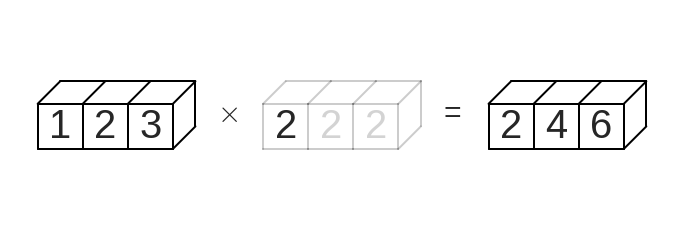

In [ ]:
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(1, 1, 1)

cube2d2(ax, (0,0),   0.1, 0.1, 0.05, '1', 40, 1.0, hidden=('R',), **box_solid)
cube2d2(ax, (0.1,0), 0.1, 0.1, 0.05, '2', 40, 1.0, hidden=('R',), **box_solid)
cube2d2(ax, (0.2,0), 0.1, 0.1, 0.05, '3', 40, 1.0, hidden=(None,), **box_solid)

ax.text(.42, .08, r'$\times$', ha='center', va='center', fontsize=30)

b_pos = 0.5
cube2d2(ax, (0+b_pos,0),   0.1, 0.1, 0.05, '2', 40, 1.0, hidden=('R',), **box_gray)
cube2d2(ax, (0.1+b_pos,0), 0.1, 0.1, 0.05, '2', 40, 0.2, hidden=('R',), **box_gray)
cube2d2(ax, (0.2+b_pos,0), 0.1, 0.1, 0.05, '2', 40, 0.2, **box_gray)

ax.text(.92, .08, '=', ha='center', va='center', fontsize=30)

cube2d2(ax, (0+b_pos*2,0),   0.1, 0.1, 0.05, '2', 40, 1.0, hidden=('R',), **box_solid)
cube2d2(ax, (0.1+b_pos*2,0), 0.1, 0.1, 0.05, '4', 40, 1.0, hidden=('R',), **box_solid)
cube2d2(ax, (0.2+b_pos*2,0), 0.1, 0.1, 0.05, '6', 40, 1.0, **box_solid)

ax.axis('off')
ax.axis('equal')

if file_print == True :
    fig.savefig("imgs/chap7/fig7-12.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap7/fig7-12.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

In [ ]:
np.random.seed(2)

m, n = 4, 3
A = np.random.randint(0, 10, m*n).reshape(m,n)
b = np.random.randint(0, 10, n)

In [ ]:
A

array([[8, 8, 6],
       [2, 8, 7],
       [2, 1, 5],
       [4, 4, 5]])

In [ ]:
b

array([7, 3, 6])

In [ ]:
A*b

array([[56, 24, 36],
       [14, 24, 42],
       [14,  3, 30],
       [28, 12, 30]])

## 그림 7-13

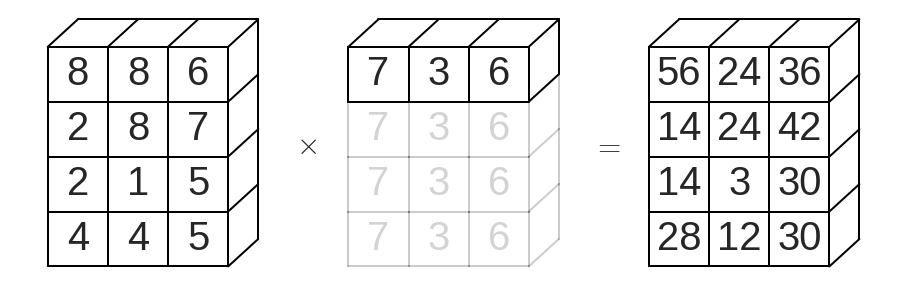

In [ ]:
fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(1, 1, 1)

dy = 0.1
dx = 0.0
for j in range(m) :
    for i in range(n):
        if i < n-1 :
            if j < m-1 :
                cube2d2(ax, (0+dy*i+dx,   0+dy*j), 0.1, 0.1, 0.05, A[::-1,:][j,i], 40, 1.0, hidden=('R', 'U'), **box_solid)
            else :
                cube2d2(ax, (0+dy*i+dx,   0+dy*j), 0.1, 0.1, 0.05, A[::-1,:][j,i], 40, 1.0, hidden=('R',), **box_solid)
        else :    
            if j < m-1 :
                cube2d2(ax, (0+dy*i+dx, 0+dy*j), 0.1, 0.1, 0.05, A[::-1,:][j,i], 40, 1.0, hidden=('U',), **box_solid)
            else :
                cube2d2(ax, (0+dy*i+dx, 0+dy*j), 0.1, 0.1, 0.05, A[::-1,:][j,i], 40, 1.0, hidden=(None,), **box_solid)    

ax.text(.43, .22, r'$\times$', ha='center', va='center', fontsize=30)

dx = 0.5        
for j in range(m) :
    for i in range(n):
        if i < n-1 :
            if j < m-1 :
                cube2d2(ax, (0+dy*i+dx,   0+dy*j), 0.1, 0.1, 0.05, b[i], 40, 0.2, hidden=('R', 'U'), **box_gray)
            else :
                cube2d2(ax, (0+dy*i+dx,   0+dy*j), 0.1, 0.1, 0.05, b[i], 40, 1.0, hidden=('R',), **box_solid)
        else :
            if j < m-1 :
                cube2d2(ax, (0+dy*i+dx, 0+dy*j), 0.1, 0.1, 0.05, b[i], 40, 0.2, hidden=('U',), **box_gray)
            else :
                cube2d2(ax, (0+dy*i+dx, 0+dy*j), 0.1, 0.1, 0.05, b[i], 40, 1.0, hidden=(None,), **box_solid) 

ax.text(.93, .22, r'$=$', ha='center', va='center', fontsize=30)

C = A*b
dx = 1.0       
for j in range(m) :
    for i in range(n):
        if i < n-1 :
            if j < m-1 :
                cube2d2(ax, (0+dy*i+dx,   0+dy*j), 0.1, 0.1, 0.05, C[::-1,:][j,i], 40, 1.0, hidden=('R', 'U'), **box_solid)
            else :
                cube2d2(ax, (0+dy*i+dx,   0+dy*j), 0.1, 0.1, 0.05, C[::-1,:][j,i], 40, 1.0, hidden=('R',), **box_solid)
        else :    
            if j < m-1 :
                cube2d2(ax, (0+dy*i+dx, 0+dy*j), 0.1, 0.1, 0.05, C[::-1,:][j,i], 40, 1.0, hidden=('U',), **box_solid)
            else :
                cube2d2(ax, (0+dy*i+dx, 0+dy*j), 0.1, 0.1, 0.05, C[::-1,:][j,i], 40, 1.0, hidden=(None,), **box_solid)  
                
ax.axis('off')

if file_print == True :
    fig.savefig("imgs/chap7/fig7-13.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap7/fig7-13.pdf", format='pdf', bbox_inches='tight')
    
    
plt.show()

In [ ]:
np.random.seed(3)

m, n = 4, 3
b = np.random.randint(0, 10, n+1)

In [ ]:
b

array([8, 9, 3, 8])

## 그림 7-14

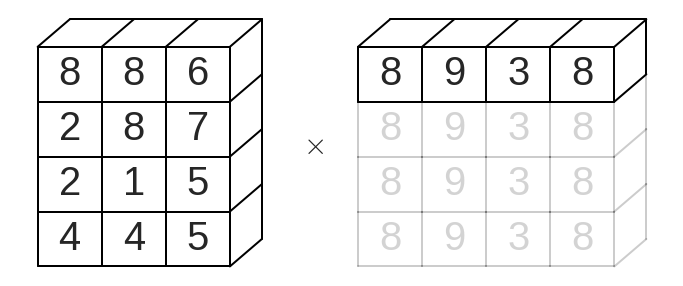

In [ ]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1, 1, 1)

dy = 0.1
dx = 0.0
for j in range(m) :
    for i in range(n):
        if i < n-1 :
            if j < m-1 :
                cube2d2(ax, (0+dy*i+dx,   0+dy*j), 0.1, 0.1, 0.05, A[::-1,:][j,i], 40, 1.0, hidden=('R', 'U'), **box_solid)
            else :
                cube2d2(ax, (0+dy*i+dx,   0+dy*j), 0.1, 0.1, 0.05, A[::-1,:][j,i], 40, 1.0, hidden=('R',), **box_solid)
        else :    
            if j < m-1 :
                cube2d2(ax, (0+dy*i+dx, 0+dy*j), 0.1, 0.1, 0.05, A[::-1,:][j,i], 40, 1.0, hidden=('U',), **box_solid)
            else :
                cube2d2(ax, (0+dy*i+dx, 0+dy*j), 0.1, 0.1, 0.05, A[::-1,:][j,i], 40, 1.0, hidden=(None,), **box_solid)    

ax.text(.43, .22, r'$\times$', ha='center', va='center', fontsize=30)

dx = 0.5        
for j in range(m) :
    for i in range(n+1):
        if i < n+1-1 :
            if j < m-1 :
                cube2d2(ax, (0+dy*i+dx,   0+dy*j), 0.1, 0.1, 0.05, b[i], 40, 0.2, hidden=('R', 'U'), **box_gray)
            else :
                cube2d2(ax, (0+dy*i+dx,   0+dy*j), 0.1, 0.1, 0.05, b[i], 40, 1.0, hidden=('R',), **box_solid)
        else :
            if j < m-1 :
                cube2d2(ax, (0+dy*i+dx, 0+dy*j), 0.1, 0.1, 0.05, b[i], 40, 0.2, hidden=('U',), **box_gray)
            else :
                cube2d2(ax, (0+dy*i+dx, 0+dy*j), 0.1, 0.1, 0.05, b[i], 40, 1.0, hidden=(None,), **box_solid) 

ax.axis('off')                

if file_print == True :
    fig.savefig("imgs/chap7/fig7-14.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap7/fig7-14.pdf", format='pdf', bbox_inches='tight')
    
plt.show()


In [ ]:
C = A * b[:, np.newaxis] #-----[1]
C


array([[64, 64, 48],
       [18, 72, 63],
       [ 6,  3, 15],
       [32, 32, 40]])

## 그림 7-15

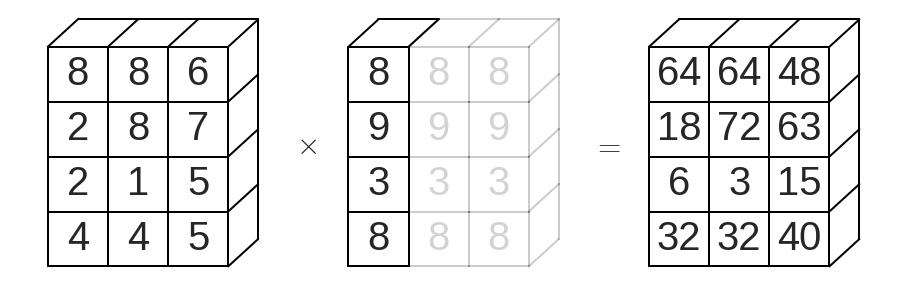

In [ ]:
fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(1, 1, 1)

dy = 0.1
dx = 0.0
for j in range(m) :
    for i in range(n) :
        if i < n-1 :
            if j < m-1 :
                cube2d2(ax, (0+dy*i+dx,   0+dy*j), 0.1, 0.1, 0.05, A[::-1,:][j,i], 40, 1.0, hidden=('R', 'U'), **box_solid)
            else :
                cube2d2(ax, (0+dy*i+dx,   0+dy*j), 0.1, 0.1, 0.05, A[::-1,:][j,i], 40, 1.0, hidden=('R',), **box_solid)
        else :    
            if j < m-1 :
                cube2d2(ax, (0+dy*i+dx, 0+dy*j), 0.1, 0.1, 0.05, A[::-1,:][j,i], 40, 1.0, hidden=('U',), **box_solid)
            else :
                cube2d2(ax, (0+dy*i+dx, 0+dy*j), 0.1, 0.1, 0.05, A[::-1,:][j,i], 40, 1.0, hidden=(None,), **box_solid)    

ax.text(.43, .22, r'$\times$', ha='center', va='center', fontsize=30)

dx = 0.5        
for j in range(m) :
    for i in range(n) :
        if i == 0 :
            style = box_solid
            la = 1.0
        else :
            style = box_gray
            la = 0.2
        
        if i < n-1 :
            if j < m-1 :
                if i == 0 :
                    cube2d2(ax, (0+dy*i+dx,   0+dy*j), 0.1, 0.1, 0.05, b[::-1][j], 40, la, hidden=('R+', 'U'), **style)
                else :
                    cube2d2(ax, (0+dy*i+dx,   0+dy*j), 0.1, 0.1, 0.05, b[::-1][j], 40, la, hidden=('R', 'U'), **style)
            else :
                if i == 0 : 
                    cube2d2(ax, (0+dy*i+dx,   0+dy*j), 0.1, 0.1, 0.05, b[::-1][j], 40, la, hidden=('R+',), **style)
                else :
                    cube2d2(ax, (0+dy*i+dx,   0+dy*j), 0.1, 0.1, 0.05, b[::-1][j], 40, la, hidden=('R',), **style)
        else :
            if j < m-1 :
                cube2d2(ax, (0+dy*i+dx, 0+dy*j), 0.1, 0.1, 0.05, b[::-1][j], 40, la, hidden=('U',), **style)
            else :
                cube2d2(ax, (0+dy*i+dx, 0+dy*j), 0.1, 0.1, 0.05, b[::-1][j], 40, la, hidden=(None,), **style) 

ax.text(.93, .22, r'$=$', ha='center', va='center', fontsize=30)

C = A * b.reshape(-1,1)  
dx = 1.0       
for j in range(m) :
    for i in range(n):
        if i < n-1 :
            if j < m-1 :
                cube2d2(ax, (0+dy*i+dx,   0+dy*j), 0.1, 0.1, 0.05, C[::-1,:][j,i], 40, 1.0, hidden=('R', 'U'), **box_solid)
            else :
                cube2d2(ax, (0+dy*i+dx,   0+dy*j), 0.1, 0.1, 0.05, C[::-1,:][j,i], 40, 1.0, hidden=('R',), **box_solid)
        else :    
            if j < m-1 :
                cube2d2(ax, (0+dy*i+dx, 0+dy*j), 0.1, 0.1, 0.05, C[::-1,:][j,i], 40, 1.0, hidden=('U',), **box_solid)
            else :
                cube2d2(ax, (0+dy*i+dx, 0+dy*j), 0.1, 0.1, 0.05, C[::-1,:][j,i], 40, 1.0, hidden=(None,), **box_solid)    

ax.axis('off')

if file_print == True :
    fig.savefig("imgs/chap7/fig7-15.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap7/fig7-15.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

In [ ]:
np.random.seed(11)

m, n = 4, 3
a = np.random.randint(0, 10, m).reshape(-1,1)
b = np.random.randint(0, 10, n)

a

array([[9],
       [0],
       [1],
       [7]])

In [ ]:
b

array([1, 7, 2])

In [ ]:
a*b

array([[ 9, 63, 18],
       [ 0,  0,  0],
       [ 1,  7,  2],
       [ 7, 49, 14]])

## 그림 7-16

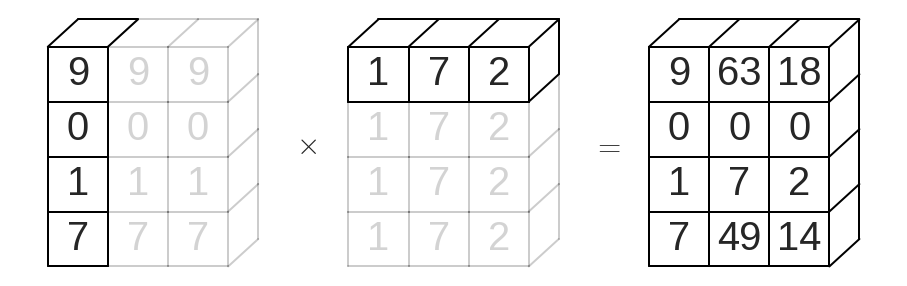

In [ ]:
fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(1, 1, 1)

dy = 0.1
dx = 0.0
for j in range(m) :
    for i in range(n) :
        if i == 0 :
            style = box_solid
            la = 1.0
        else :
            style = box_gray
            la = 0.2
        
        if i < n-1 :
            if j < m-1 :
                if i == 0 :
                    cube2d2(ax, (0+dy*i+dx,   0+dy*j), 0.1, 0.1, 0.05, a[::-1][j,0], 40, la, hidden=('R+', 'U'), **style)
                else :
                    cube2d2(ax, (0+dy*i+dx,   0+dy*j), 0.1, 0.1, 0.05, a[::-1][j,0], 40, la, hidden=('R', 'U'), **style)
            else :
                if i == 0 : 
                    cube2d2(ax, (0+dy*i+dx,   0+dy*j), 0.1, 0.1, 0.05, a[::-1][j,0], 40, la, hidden=('R+',), **style)
                else :
                    cube2d2(ax, (0+dy*i+dx,   0+dy*j), 0.1, 0.1, 0.05, a[::-1][j,0], 40, la, hidden=('R',), **style)
        else :
            if j < m-1 :
                cube2d2(ax, (0+dy*i+dx, 0+dy*j), 0.1, 0.1, 0.05, a[::-1][j,0], 40, la, hidden=('U',), **style)
            else :
                cube2d2(ax, (0+dy*i+dx, 0+dy*j), 0.1, 0.1, 0.05, a[::-1][j,0], 40, la, hidden=(None,), **style) 
ax.text(.43, .22, r'$\times$', ha='center', va='center', fontsize=30)

dx = 0.5        
for j in range(m) :
    for i in range(n):
        if i < n-1 :
            if j < m-1 :
                cube2d2(ax, (0+dy*i+dx,   0+dy*j), 0.1, 0.1, 0.05, b[i], 40, 0.2, hidden=('R', 'U'), **box_gray)
            else :
                cube2d2(ax, (0+dy*i+dx,   0+dy*j), 0.1, 0.1, 0.05, b[i], 40, 1.0, hidden=('R',), **box_solid)
        else :
            if j < m-1 :
                cube2d2(ax, (0+dy*i+dx, 0+dy*j), 0.1, 0.1, 0.05, b[i], 40, 0.2, hidden=('U',), **box_gray)
            else :
                cube2d2(ax, (0+dy*i+dx, 0+dy*j), 0.1, 0.1, 0.05, b[i], 40, 1.0, hidden=(None,), **box_solid) 

ax.text(.93, .22, r'$=$', ha='center', va='center', fontsize=30)

C = a*b
dx = 1.0       
for j in range(m) :
    for i in range(n):
        if i < n-1 :
            if j < m-1 :
                cube2d2(ax, (0+dy*i+dx,   0+dy*j), 0.1, 0.1, 0.05, C[::-1,:][j,i], 40, 1.0, hidden=('R', 'U'), **box_solid)
            else :
                cube2d2(ax, (0+dy*i+dx,   0+dy*j), 0.1, 0.1, 0.05, C[::-1,:][j,i], 40, 1.0, hidden=('R',), **box_solid)
        else :    
            if j < m-1 :
                cube2d2(ax, (0+dy*i+dx, 0+dy*j), 0.1, 0.1, 0.05, C[::-1,:][j,i], 40, 1.0, hidden=('U',), **box_solid)
            else :
                cube2d2(ax, (0+dy*i+dx, 0+dy*j), 0.1, 0.1, 0.05, C[::-1,:][j,i], 40, 1.0, hidden=(None,), **box_solid)    

ax.axis('off')

if file_print == True :
    fig.savefig("imgs/chap7/fig7-16.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap7/fig7-16.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

# 행렬 곱셈의 해석

## 행렬곱을 열조합으로 계산

In [ ]:
np.random.seed(10)

A = np.random.randint(0, 9, 12).reshape(4,3)
b = np.random.randint(0, 9, 3).reshape(3,1)

In [ ]:
A

array([[4, 0, 1],
       [0, 1, 8],
       [0, 8, 6],
       [4, 3, 0]])

In [ ]:
b

array([[4],
       [6],
       [8]])

In [ ]:
C = np.dot(A,b)

C

array([[24],
       [70],
       [96],
       [34]])

In [ ]:
C_ = np.array([A[:,[i]]*b[i] for i in range(A.shape[1])])
print(C_.shape)
C_.sum(axis=0)

(3, 4, 1)


array([[24],
       [70],
       [96],
       [34]])

### 이번엔 뒤가 행렬인 경우로 확장

In [ ]:
B = np.random.randint(0, 9, 6).reshape(3,2)

In [ ]:
B

array([[1, 8],
       [4, 1],
       [3, 6]])

In [ ]:
C = np.dot(A,B)

C

array([[ 7, 38],
       [28, 49],
       [50, 44],
       [16, 35]])

In [ ]:
C_ = np.array([ [A[:,[i]]*B[i,j] for i in range(A.shape[1]) ] for j in range(B.shape[1]) ])

print(C_.shape)
C_ = C_.transpose(1, 2, 0, 3)
print(C_.shape)
C_ = C_.sum(axis=0)
print(C_.shape)
C_.squeeze()

(2, 3, 4, 1)
(3, 4, 2, 1)
(4, 2, 1)


array([[ 7, 38],
       [28, 49],
       [50, 44],
       [16, 35]])

## 행렬곱을 행조합으로 계산

In [ ]:
# 직접 확인해보세요.

## 행렬곱을 외적합으로 계산

In [ ]:
# 직접 확인해보세요.

# 행렬을 이용한 코딩



## 벡터화 실습 1 (기본 곱셈)

In [ ]:
A = np.eye(5)*np.array([1,3,0,5,4])

In [ ]:
A

array([[1., 0., 0., 0., 0.],
       [0., 3., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 5., 0.],
       [0., 0., 0., 0., 4.]])

In [ ]:
A = np.random.randint(0,10,12).reshape(4,3) #-----[1]
x = np.random.randint(0,10,3)


print(A)
print(x)

[[5 3 9]
 [6 9 1]
 [9 4 2]
 [6 7 8]]
[8 9 2]


In [ ]:
m = x.shape[0] #-----[2]
y = [] #-----[3]
temp = 0
for i in range(A.shape[0]) : #-----[4]
    for j in range(m) : #-----[5]
        temp += A[i,j]*x[j] #-----[6]
    y.append(temp) #-----[7]
    temp = 0


In [ ]:
y

[85, 131, 112, 127]

In [ ]:
A.dot(x)

array([ 85, 131, 112, 127])

In [ ]:
A@x

array([ 85, 131, 112, 127])

## 벡터화 실습 2 (전치 곱셈)

In [ ]:
A = np.random.randint(0,10,12).reshape(3,4) 
x = np.random.randint(0,10,3)

In [ ]:
m = x.shape[0] 
y = [] 
temp = 0
for i in range(A.shape[1]) : 
    for j in range(m) : 
        temp += A[j,i]*x[j] #-----[1]
    y.append(temp) 
    temp = 0


In [ ]:
y

[8, 162, 97, 120]

In [ ]:
y = A.T.dot(x) 
y

array([  8, 162,  97, 120])

In [ ]:
A.T@x

array([  8, 162,  97, 120])

## 그림 7-17

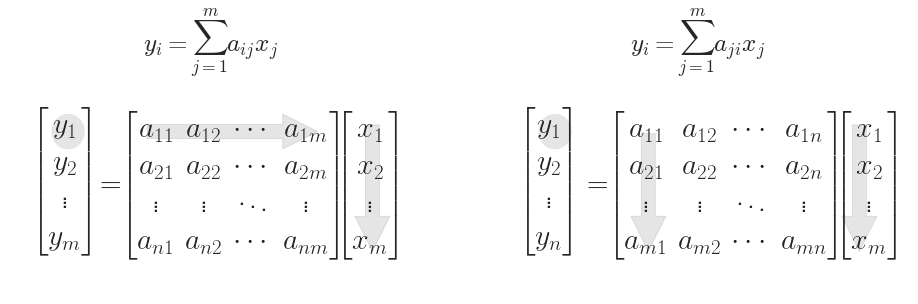

In [ ]:
fig = plt.figure(figsize=(16,4))
ax = [fig.add_subplot(1, 2, 1), fig.add_subplot(1, 2, 2)]

plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

pdf_shift = 0.02

y = [ r"$\begin{bmatrix}" + \
r"y_{1} \\" + \
r"y_{2} \\" + \
r"\vdots \\" + \
r"y_{m} " + \
r"\end{bmatrix}$",
    r"$\begin{bmatrix}" + \
r"y_{1} \\" + \
r"y_{2} \\" + \
r"\vdots \\" + \
r"y_{n} " + \
r"\end{bmatrix}$" 
    ]

A = [ r"$\begin{bmatrix}" + \
r"a_{11} & a_{12} & \cdots & a_{1m} \\" + \
r"a_{21} & a_{22} & \cdots & a_{2m} \\" + \
r"\vdots & \vdots & \ddots & \vdots \\" + \
r"a_{n1} & a_{n2} & \cdots & a_{nm}" + \
r"\end{bmatrix}$", 
     r"$\begin{bmatrix}" + \
r"a_{11} & a_{12} & \cdots & a_{1n} \\" + \
r"a_{21} & a_{22} & \cdots & a_{2n} \\" + \
r"\vdots & \vdots & \ddots & \vdots \\" + \
r"a_{m1} & a_{m2} & \cdots & a_{mn}" + \
r"\end{bmatrix}$" 
    ]

x = r"$\begin{bmatrix}" + \
r"x_{1} \\" + \
r"x_{2} \\" + \
r"\vdots \\" + \
r"x_{m} " + \
r"\end{bmatrix}$"

for i in [0, 1]:
    ax[i].text(0.08, 0.25, y[i], fontsize=30)
    ax[i].text(0.21+pdf_shift, 0.24, r'$=$', fontsize=30)
    ax[i].text(0.3, 0.24, A[i], fontsize=30)
    if i == 0 :
        ax[i].text(0.83, 0.24, x, fontsize=30)
    else:
        ax[i].text(0.86, 0.24, x, fontsize=30)
        
    if i == 0 :
        a = FancyArrowPatch((0.32+pdf_shift, 0.38), (0.75+pdf_shift, 0.38) , lw=1, mutation_scale=70, alpha=0.2, color='gray')
    else :
        a = FancyArrowPatch((0.36+pdf_shift, 0.38), (0.36+pdf_shift, 0.1) , lw=1, mutation_scale=70, alpha=0.2, color='gray')
    ax[i].add_patch(a)

    b = FancyArrowPatch((0.88+pdf_shift, 0.4), (0.88+pdf_shift, 0.1) , lw=1, mutation_scale=70, alpha=0.2, color='gray')
    ax[i].add_patch(b)

    c = Circle((0.13+pdf_shift, 0.38), 0.04, alpha=0.2, color='gray')
    ax[i].add_patch(c)

    if i == 0 :
        ax[i].set_title(r"$y_i = \sum_{j=1}^m a_{ij}x_j $", fontsize=25)
    else :
        ax[i].set_title(r"$y_i = \sum_{j=1}^m a_{ji}x_j $", fontsize=25)
        
    ax[i].axis('off')
    
    ax[i].set_xlim(0, 1)
    ax[i].set_ylim(0, 0.5)
    
if file_print == True :
    fig.savefig("imgs/chap7/fig7-17.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap7/fig7-17.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

## 그림 7-18

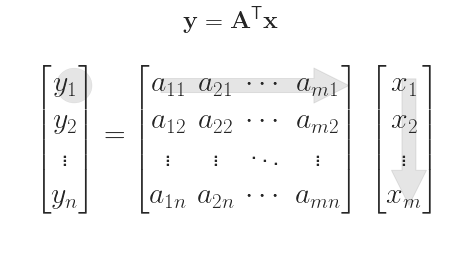

In [ ]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1, 1, 1)

plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

pdf_shift = 0.02

y = r"$\begin{bmatrix}" + \
r"y_{1} \\" + \
r"y_{2} \\" + \
r"\vdots \\" + \
r"y_{n} " + \
r"\end{bmatrix}$"

A = r"$\begin{bmatrix}" + \
r"a_{11} & a_{21} & \cdots & a_{m1} \\" + \
r"a_{12} & a_{22} & \cdots & a_{m2} \\" + \
r"\vdots & \vdots & \ddots & \vdots \\" + \
r"a_{1n} & a_{2n} & \cdots & a_{mn}" + \
r"\end{bmatrix}$"

x = r"$\begin{bmatrix}" + \
r"x_{1} \\" + \
r"x_{2} \\" + \
r"\vdots \\" + \
r"x_{m} " + \
r"\end{bmatrix}$"

ax.text(0.08, 0.24, y, fontsize=30)
ax.text(0.2+pdf_shift, 0.25, r'$=$', fontsize=30)
ax.text(0.3, 0.24, A, fontsize=30)
ax.text(0.83, 0.24, x, fontsize=30)

a = FancyArrowPatch((0.32+pdf_shift, 0.38), (0.75+pdf_shift, 0.38) , lw=1, mutation_scale=70, alpha=0.2, color='gray')
ax.add_patch(a)

b = FancyArrowPatch((0.88+pdf_shift, 0.4), (0.88+pdf_shift, 0.1) , lw=1, mutation_scale=70, alpha=0.2, color='gray')
ax.add_patch(b)

c = Circle((0.13+pdf_shift, 0.38), 0.04, alpha=0.2, color='gray')
ax.add_patch(c)

ax.axis('off')

ax.set_title(r"$\mathbf{y} = \mathbf{A}^\text{T}\mathbf{x} $", fontsize=25)

ax.set_xlim(0, 1)
ax.set_ylim(0, 0.5)
    
if file_print == True :
    fig.savefig("imgs/chap7/fig7-18.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap7/fig7-18.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

## 벡터화 실습 3 (선형회귀 식)

In [ ]:
np.random.seed(10)

n, m = 5, 2

X = np.random.rand(n, m)
w = np.random.rand(m)
y = np.random.rand(n)

In [ ]:
X

array([[0.7713, 0.0208],
       [0.6336, 0.7488],
       [0.4985, 0.2248],
       [0.1981, 0.7605],
       [0.1691, 0.0883]])

In [ ]:
w

array([0.6854, 0.9534])

In [ ]:
y

array([0.0039, 0.5122, 0.8126, 0.6125, 0.7218])

In [ ]:
g = np.zeros_like(w)

# X:(5,2), y:(5,), w:(2,)
for j in range(m):
    for i in range(n):
        g[j] += (np.dot(X[i,:], w) - y[i]) * X[i,j]
        

In [ ]:
g

array([0.656 , 0.5726])

In [ ]:
g = np.dot(X.T, np.dot(X,w)-y)

In [ ]:
g

array([0.656 , 0.5726])

In [ ]:
%%timeit
# X:(5,2), y:(5,), w:(2,)
for j in range(m):
    for i in range(n):
        g[j] += (np.dot(X[i,:], w) - y[i]) * X[i,j]

10000 loops, best of 3: 23.7 µs per loop


In [ ]:
%%timeit
g = np.dot(X.T, np.dot(X,w)-y)

The slowest run took 16.86 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 3.05 µs per loop


### 참고 einsum

In [ ]:
np.einsum('i,ij->j', np.einsum('ij,j->i', X, w) - y, X)

array([0.656 , 0.5726])

In [ ]:
%%timeit
np.einsum('i,ij->j', np.einsum('ij,j->i', X, w) - y, X)

The slowest run took 8.56 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 6.29 µs per loop
